In [2]:
from sklearn import datasets                              ## importing inbuilt sklearn datasets

In [3]:
import numpy as np                                        ## importing numpy for easy mathematical calculations
import re                                                 ## importing regex module for easy dealing with strings and substrings

In [4]:
from sklearn.datasets import fetch_20newsgroups           ## fetching the inbult newsgroups dataset and getting
train_data = fetch_20newsgroups(subset='train')           ## training and testing data seperately using subset parameter
test_data = fetch_20newsgroups(subset='test')

In [9]:
print(train_data.data[0])                                 ## seeing how a document looks like

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [13]:
### Converting all required training and testing split into numpy arrays
x_train = np.array(train_data.data)
y_train = np.array(train_data.target)
x_test = np.array(test_data.data)
y_test = np.array(test_data.target)

In [14]:
##  from nltk extracting stopwords
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
## creating our dictionary using all words in train data 
## avoiding non alpha numneric characters, words whose length <= 2 and words in stop words 
d = {}
for i in x_train:
    x_row = i.lower()
    x_row = re.split(r'\W+', x_row)
    for j in x_row:
        if len(j)<=2 or not(j.isalpha()) or j in stop_words:
            continue
        d[j] = d.get(j, 0)+1

In [80]:
# d

In [17]:
def f(e):
    return e[1]

In [82]:
## sorting in descending order according to frequency of words
d_s = sorted(d.items(), key = f, reverse = True)
d_s[:10]

[('edu', 21321),
 ('subject', 12264),
 ('com', 12133),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9008),
 ('would', 8905),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5975)]

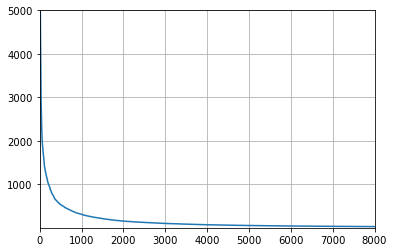

In [21]:
## take out the most frequent words in training data
## plotting graph to find how many number of features to take
import matplotlib.pyplot as plt
x_axis = []
y_axis = []
for i in range(len(d_s)):
    x_axis.append(i)
    y_axis.append(d_s[i][1])
plt.plot(x_axis, y_axis)
plt.axis([0, 8000, 1, 5000])
plt.grid()
plt.show()

In [22]:
### by seeing above graph we decided to consider top 500 features for our  vocabulary
### the accuracy would be more if we take around 2000 but it takes more time to run all those words

In [83]:
# storing the top 1000 frequent words in vocabulary
vocabulary = [d_s[i][0] for i in range(1000)]
vocabulary[:10]

['edu',
 'subject',
 'com',
 'lines',
 'organization',
 'one',
 'would',
 'writes',
 'article',
 'people']

In [53]:
## creating x_train_dataset
## this is created like there will be columns of vocabulary and there will be rows of each document in training data 
## and values as number of times a particular word in vocabulary in that particular documnent
x_train_dataset = np.zeros([len(x_train), len(vocabulary)], int)
for i in range(len(x_train)):
    words = re.split(r'[\W]+', x_train[i].lower())
    for j in words:
        if j in vocabulary:
            x_train_dataset[i][vocabulary.index(j)] += 1

In [54]:
## creating x_test_dataset
## this is created like there will be columns of vocabulary and there will be rows of each document in testing data 
## and values as number of times a particular word in vocabulary in that particular documnent
x_test_dataset = np.zeros([len(x_test), len(vocabulary)], int)
for i in range(len(x_test)):
    words = re.split(r'[\W]+', x_test[i].lower())
    for j in words:
        if j in vocabulary:
            x_test_dataset[i][vocabulary.index(j)] += 1

In [84]:
## the training data looks like this 
x_train_dataset[:10]

array([[2, 1, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [6, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 1]])

In [56]:
## using sklearn inbuilt Multinomial naive bayes for the predictions 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_dataset, y_train)
y_pred = clf.predict(x_test_dataset)

In [57]:
## evaluating score and accuracy of the predictions
from sklearn.metrics import classification_report, confusion_matrix
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.7761180837899947
Score on testing data: 0.6408656399362719
[[195   0   1   1   2   0   4   2  15   4   0   3   2   6   2  24   9   7
    3  39]
 [  3 242   9  12  22  19  22   7   8   3   0   2  23   7   7   0   0   0
    0   3]
 [  1  58 145  62  32  40  11   6   4   5   1   1  11  10   2   0   0   0
    2   3]
 [  0  29  10 196  56   2  23   8   9   2   1   0  53   2   1   0   0   0
    0   0]
 [  0  11   2  48 240   0  31   8   7   3   1   0  26   3   4   1   0   0
    0   0]
 [  0  76  16  13  16 221   9   4   5   4   0   3  16   3   8   0   0   0
    1   0]
 [  0   3   0  19   9   0 330   8   4   1   2   1   9   1   1   0   0   0
    1   1]
 [  1   2   3   4   5   1  21 287  28   2   1   0  20   6   7   0   2   0
    5   1]
 [  1   2   0   3   0   1  11  24 329   2   1   0   5   6   4   0   3   0
    4   2]
 [  3   4   0   0   2   0  18   4  17 292  38   0   7   6   2   0   3   0
    1   0]
 [  0   2   0   1   2   0   4   2  15  58 306   0   1   0   3   0

## Constructing multinomial naive bayes from scratch

In [58]:
## creating a fit function that returns a dictionary 
## consisting of total number of respective vocabulary words present in training data

In [59]:
def fit(x_train_dataset, y_train):
    d = { }                                        ### creating a dictionary to generate vocabulary from all words present in our training data x_train
    classes = set(y_train)                         ### listing out all possible classes available in training data
    d['total_docs'] = len(y_train)
    for i in classes:
        d[i] = {}
        d[i]['docs_in_class'] = len(y_train[y_train==i])
        x_train_dataset_i = x_train_dataset[y_train==i]
        total_class_words = 0
        for j in vocabulary:
            d[i][j] = (x_train_dataset_i[:, vocabulary.index(j)]).sum()
            total_class_words += d[i][j]
        d[i]['words_in_class'] = total_class_words
    return d

In [60]:
## predicting class for a particular document and returning the predicted best fit class

In [61]:
def predict_for_single(x, dictionary):
    classes = set(dictionary.keys())
    max_prob = -100000
    best_fit_cls = 0
    flag = True
    for i in classes:
        if i=='total_docs':
            continue
        product = np.log(dictionary[i]['docs_in_class']) - np.log(dictionary['total_docs'])
        for j in vocabulary:
            if x[vocabulary.index(j)]==0:
                continue
            l = len(vocabulary)
            product += np.log(dictionary[i][j]+1) - np.log(dictionary[i]['words_in_class']+l)
        if max_prob < product or flag:
            max_prob = product
            best_fit_cls = i
            flag = False
    return best_fit_cls

In [62]:
## predict function for testing data

In [63]:
def predict(x_test_dataset, dictionary):
    result = []
    for i in x_test_dataset:
        ans = predict_for_single(i, dictionary)
        result.append(ans)
    return result

In [64]:
dictionary = fit(x_train_dataset, y_train)

In [86]:
# dictionary

In [66]:
y_pred = predict(x_test_dataset, dictionary)

In [87]:
y_pred[:10]

[7, 8, 0, 18, 0, 0, 8, 12, 5, 1]

In [68]:
## normal score function defined to see how many of the actuall are predicted correctly

In [69]:
def score(y_test, y_pred):
    return (y_test==y_pred).sum()/len(y_test)

In [70]:
score(y_test, y_pred)

0.6295804567180032

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.60       319
           1       0.43      0.63      0.51       389
           2       0.70      0.17      0.27       394
           3       0.54      0.51      0.52       392
           4       0.53      0.66      0.59       385
           5       0.75      0.51      0.61       395
           6       0.60      0.86      0.71       390
           7       0.62      0.74      0.68       396
           8       0.55      0.84      0.67       398
           9       0.77      0.75      0.76       397
          10       0.89      0.79      0.84       399
          11       0.91      0.72      0.80       396
          12       0.40      0.54      0.46       393
          13       0.62      0.51      0.56       396
          14       0.81      0.66      0.73       394
          15       0.82      0.76      0.79       398
          16       0.62      0.73      0.67       364
          17       0.92    

In [73]:
print(confusion_matrix(y_test, y_pred))

[[202   1   0   2   1   1   4   3  14   3   0   2   3   7   4  16   8   7
    3  38]
 [  2 244   5   8  22  16  17   8   9   1   1   3  36   8   7   0   0   0
    1   1]
 [  3  89  66  81  38  43  14   4  10   3   1   3  19  13   1   0   1   0
    3   2]
 [  0  31   8 200  62   1  22  12   5   1   0   0  49   1   0   0   0   0
    0   0]
 [  0  14   1  33 253   0  28   8   9   3   1   0  26   3   4   0   2   0
    0   0]
 [  0  95  10  11  18 203  17   6   3   0   0   2  22   5   2   0   0   0
    1   0]
 [  0   1   0  13  11   0 337   8   4   1   0   1  10   1   1   0   0   0
    1   1]
 [  1   2   1   2   2   0  20 295  31   0   1   0  24   3   4   0   5   0
    4   1]
 [  0   2   0   0   0   0  10  29 333   3   0   0   7   4   0   0   6   0
    3   1]
 [  2   7   0   0   3   0  14   7  16 297  29   0  10   5   4   1   0   0
    2   0]
 [  0   1   0   1   2   0   7   1  14  52 315   0   1   0   0   1   0   0
    3   1]
 [  1  11   1   1   7   1   4   5  10   0   0 285  25   8   7   0

In [77]:
print("Score on testing data from scratch code:",score(y_pred, y_test))    ### calculating score using code from scratch

Score on testing data from scratch code: 0.6295804567180032
